In [ ]:
import pandas as pd
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
data = keras.datasets.cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
seed = 7
numpy.random.seed(seed)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
label = {0 : 'airplane',
          1 : 'automobile',
          2 : 'bird',
          3 : 'cat',
          4 : 'deer',
          5 : 'dog',
          6 : 'frog',
          7 : 'horse',
          8 : 'ship',
          9 : 'truck'}

In [ ]:


img_height = 32
img_width = 32
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
epochs=50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

In [ ]:
 
 
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),epochs=epochs, batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6630 - accuracy: 0.3908 - val_loss: 1.3004 - val_accuracy: 0.5341
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1848 - accuracy: 0.5787 - val_loss: 1.0958 - val_accuracy: 0.6161
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9866 - accuracy: 0.6527 - val_loss: 0.9670 - val_accuracy: 0.6576
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8641 - accuracy: 0.6965 - val_loss: 0.8859 - val_accuracy: 0.6938
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7728 - accuracy: 0.7284 - val_loss: 0.9107 - val_accuracy: 0.6813
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7003 - accuracy: 0.7532 - val_loss: 0.8709 - val_accuracy: 0.7019
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6468 - accuracy: 0.7728 - val_loss: 0.7983 - val_accuracy:

In [ ]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.72%


In [ ]:
y=model.predict_classes(X_train[[1],:])
print(y[0])

9


5 dog


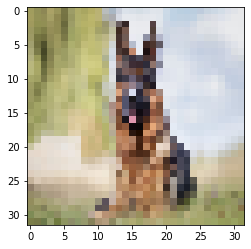

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = tf.keras.preprocessing.image.load_img('/content/1.jpg', target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img=model.predict(img)
classes = np.argmax(img[0], axis = 0)
print(classes,labels[classes])

2 bird


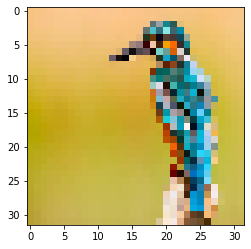

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/4.jpg', target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img=model.predict(img)
classes = np.argmax(img[0], axis = 0)
print(classes,labels[classes])

0 airplane


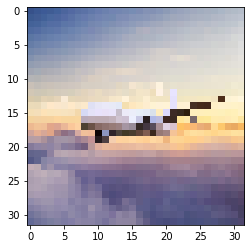

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/2.jpg', target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img=model.predict(img)
classes = np.argmax(img[0], axis = 0)
print(classes,labels[classes])

8 ship


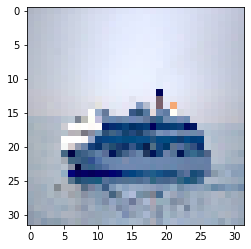

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/3.jpg', target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img=model.predict(img)
classes = np.argmax(img[0], axis = 0)
print(classes,labels[classes])

6 frog


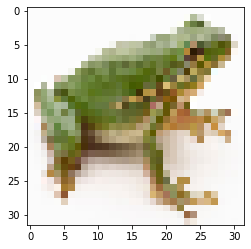

In [ ]:

img = tf.keras.preprocessing.image.load_img('/content/5.jpg', target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img=model.predict(img)
classes = np.argmax(img[0], axis = 0)
print(classes,labels[classes])